# Get number of sputtered and injected atoms from etch.dat

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [14]:
path2target = "/Users/y1u0d2/desktop/Lab/result/lammps/Si/sputtering/ml/model_21/0deg_500eV"

In [15]:
from mlptools.analyzer.sputtering_yield import SputteringYieldCalculator

syc = SputteringYieldCalculator(path2target)
sp_df = syc.get_n_sputtered_atoms_with_timestep(target_atom_type=[1])
sp_with_ion_dose = syc.get_sputtering_yield_with_ion_dose(area=4.0725**2, num_injection=15, target_atom_type=[1])

Number of total timestep: 20000000
Inject atom every 20000 timestep
Number of injected atoms: 1000


In [16]:
sp_with_ion_dose.head()

,timestep,num_sputtered_atom,num_inserted_atoms,ion_dose,num_sputtered_atom_avg
19,20000,0,2,0.120589,0.944444
40,40000,0,3,0.180884,0.947368
61,60000,0,4,0.241178,0.900000
82,80000,0,5,0.301473,0.857143
103,100000,0,6,0.361767,0.863636


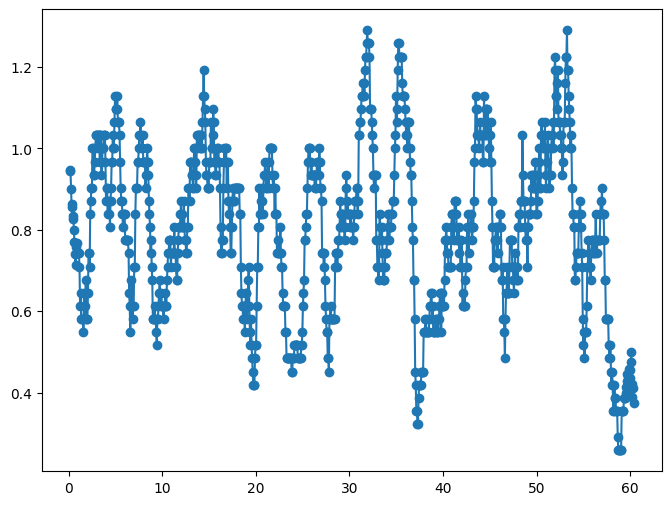

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(sp_with_ion_dose["ion_dose"], sp_with_ion_dose["num_sputtered_atom_avg"], marker="o")